In [1]:
!pip install keras
!pip install tensorflow
!pip install xgboost
!pip install catboost

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

## Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [3]:
train_df = pd.read_csv("TrainingData.csv")
train_df.shape

C:\Users\devan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(83000, 53)

In [4]:
train_df1 = train_df.drop(['mvar47','application_key'], axis=1)

train_df2 = train_df1.replace(to_replace ="[a-zA-Z]+", value = np.nan, regex = True)
train_df2 = train_df2.astype('float')
train_df2 = pd.concat([train_df2, train_df['mvar47']], axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mvar1        79267 non-null  float64
 1   mvar2        77114 non-null  float64
 2   mvar3        82465 non-null  float64
 3   mvar4        82465 non-null  float64
 4   mvar5        82465 non-null  float64
 5   mvar6        63299 non-null  float64
 6   mvar7        75326 non-null  float64
 7   mvar8        63291 non-null  float64
 8   mvar9        71318 non-null  float64
 9   mvar10       82465 non-null  float64
 10  mvar11       36283 non-null  float64
 11  mvar12       68422 non-null  float64
 12  mvar13       73311 non-null  float64
 13  mvar14       83000 non-null  float64
 14  mvar15       49481 non-null  float64
 15  mvar16       63757 non-null  float64
 16  mvar17       66501 non-null  float64
 17  mvar18       67641 non-null  float64
 18  mvar19       82995 non-null  float64
 19  mvar

In [5]:
train_df2.head(10)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar43,mvar44,mvar45,mvar46,mvar48,mvar49,mvar50,mvar51,default_ind,mvar47
0,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,10.0,0.63899,NaN,0.0,10.0,770.0,4.0,3080.0,0.0,C
1,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,13.0,0.63836,NaN,NaN,732.0,437.0,5.0,2185.0,1.0,L
2,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,1.0,1.00000,NaN,0.0,89.0,795.0,4.0,3180.0,1.0,C
3,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,3.0,0.53241,0.0,0.0,3.0,755.0,4.0,3020.0,0.0,L
4,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,1.0,0.92665,NaN,NaN,5.0,425.0,4.0,1700.0,0.0,L
5,1579.0,NaN,3.502,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,35.0,455.0,4.0,1820.0,1.0,C
6,1818.0,0.4001,0.000,0.0,0.0,NaN,1088.0,NaN,1536.0,1498.0,...,2.0,0.87224,NaN,0.0,2.0,392.0,5.0,1960.0,1.0,C
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,615.0,NaN,NaN,0.0,C
8,1836.0,0.1358,0.000,0.0,0.0,347.0,38964.0,17828.0,70729.0,65843.0,...,10.0,0.89868,0.0,0.0,5.0,821.0,5.0,4105.0,1.0,L
9,1839.0,0.1981,0.000,0.0,0.0,793.0,6131.0,6045.0,48959.0,31640.0,...,14.0,0.33834,NaN,0.0,3247.0,408.0,5.0,2040.0,0.0,L


In [6]:
# one hot encoding 
train_df2 = pd.get_dummies(train_df2, columns=['mvar47'])
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mvar1        79267 non-null  float64
 1   mvar2        77114 non-null  float64
 2   mvar3        82465 non-null  float64
 3   mvar4        82465 non-null  float64
 4   mvar5        82465 non-null  float64
 5   mvar6        63299 non-null  float64
 6   mvar7        75326 non-null  float64
 7   mvar8        63291 non-null  float64
 8   mvar9        71318 non-null  float64
 9   mvar10       82465 non-null  float64
 10  mvar11       36283 non-null  float64
 11  mvar12       68422 non-null  float64
 12  mvar13       73311 non-null  float64
 13  mvar14       83000 non-null  float64
 14  mvar15       49481 non-null  float64
 15  mvar16       63757 non-null  float64
 16  mvar17       66501 non-null  float64
 17  mvar18       67641 non-null  float64
 18  mvar19       82995 non-null  float64
 19  mvar

# **Exploratory Data Analysis**

**Classes' Distribution**

C:\Users\devan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


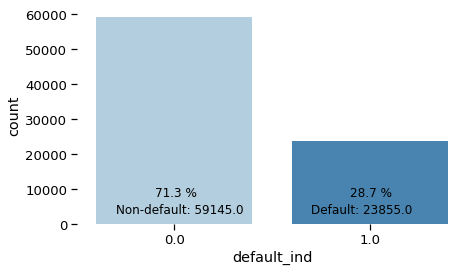

In [7]:
# The frequency of defaults
yes = train_df2.default_ind.sum()
no = len(train_df2)-yes

# Percentage
yes_perc = round(yes/len(train_df2)*100, 1)
no_perc = round(no/len(train_df2)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('default_ind', data=train_df2, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
#Removing the frame
plt.box(False);

<AxesSubplot: >

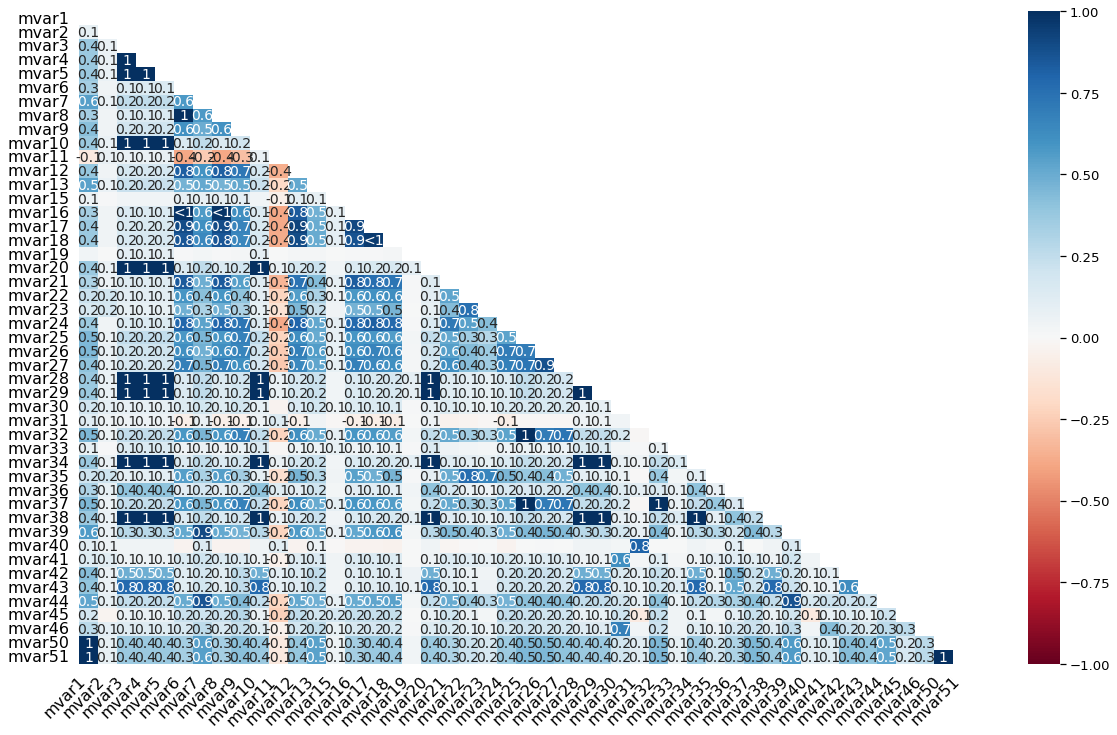

In [8]:
# this code helps us figure out if there is any relation between the missing values of two or more columns
# whether it is a case of MACR or MAR

import missingno as msno
msno.heatmap(train_df2)

#### **Train Test Split and then doing Feature Engineering**

In [7]:
X = train_df2.drop(['default_ind'], axis = 1)
y = train_df2['default_ind']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

df_list = [X_train, X_test]

In [8]:
for df in df_list:
    df['mvar7'] = df['mvar7'] + df['mvar8'] 
    df['mvar11_12'] = df['mvar11']/df['mvar12'] 
    mvar161718 = (df['mvar16'].add(df['mvar17'], 
                                 fill_value=0)).add(df['mvar18'], 
                                                    fill_value=0)
    df['mvar16'] = mvar161718
    df['mvar19'] = df['mvar19'] + df['mvar20'] 
    df['mvar16_19'] = df['mvar16']/df['mvar19'] 
    df['mvar26'] = (df['mvar26']+df['mvar27'])
    df['mvar30'] = df['mvar30'] + df['mvar31']
    df['mvar30_32'] = (df['mvar30']/30) / df['mvar32']
    df['mvar35'] = df['mvar35'] + df['mvar34']
    df['mvar28_36'] = df['mvar28'] / df['mvar36']
    df['mvar22_38'] = (df['mvar22']/100) * df['mvar38']
    df['mvar39_36'] = df['mvar39'] / df['mvar36']
    df['mvar34_39'] = df['mvar34'] / df['mvar39']
    df['mvar43_36'] = df['mvar43'] / df['mvar36']
    df['mvar43_38'] = df['mvar43'] / df['mvar38']
    df['mvar45'] = (df['mvar45'] + df['mvar46'])
    df = df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
#Since we have combined certain columns, we need to drop those which are already considered in the combination.

X_train1 = X_train.drop(['mvar8', 'mvar17', 'mvar18', 'mvar20', 'mvar22', 'mvar27', 'mvar31', 'mvar34', 'mvar38', 
                         'mvar46', 'mvar48', 'mvar49'], axis=1)

X_test1 = X_test.drop(['mvar8', 'mvar17', 'mvar18', 'mvar20', 'mvar22', 'mvar27', 'mvar31', 'mvar34', 'mvar38', 
                       'mvar46', 'mvar48', 'mvar49'], axis=1)

In [10]:
null_df = pd.DataFrame((X_train1.isnull().sum())*100/X_train1.shape[0]).reset_index()
null_df.columns = ['Column Name', 'Null Values Percentage']

# more than or equal to 40% empty rows columns
nullcol_50_df = null_df[null_df["Null Values Percentage"]>=50]
nullcol_50_df.sort_values(by='Null Values Percentage', ascending=False)

,Column Name,Null Values Percentage
46,mvar34_39,93.801475
42,mvar30_32,84.085596
23,mvar30,83.128934
30,mvar40,78.329437
40,mvar11_12,74.216867
31,mvar41,68.868908
35,mvar45,62.006833
41,mvar16_19,57.856501
9,mvar11,56.363963
17,mvar23,51.084337


In [11]:
# dropping columns which have > 70% NULL values
X_train2 = X_train1.drop(['mvar30_32', 'mvar34_39', 'mvar30', 'mvar40'], axis=1)
X_test2 = X_test1.drop(['mvar30_32', 'mvar34_39', 'mvar30', 'mvar40'], axis=1)

**Scaling and normalisation**

it is necessary because we will be using knn imputation as well as SMOTE for oversampling, which is also based on KNN methodology. For this reason, we need to scale the data so that higher magnitudes don't led to formation of clusters when using KNN.

*Standardization*


In [12]:
# importing sklearn StandardScaler class which is for Standardization
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler() # creating an instance of the class object
#df_scaled = pd.DataFrame(sc.fit_transform(train_df4), columns=train_df4.columns)  #fit and transforming StandardScaler the dataframe 

*Robust Scaling*

In [13]:
# importing sklearn Min Max Scaler class which is for Robust scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler() # creating an instance of the class object
X_tr_sc = rs.fit_transform(X_train2)
X_te_sc = rs.fit_transform(X_test2)
Xtrain_scaled = pd.DataFrame(X_tr_sc, columns=X_train2.columns)
Xtest_scaled = pd.DataFrame(X_te_sc, columns=X_test2.columns)

**Check Correlation**

In [14]:
X_comb = pd.DataFrame(pd.concat([Xtrain_scaled, Y_train], axis=1))

In [15]:
#Correlation with output variable
cor = X_comb.corr()
cor_target = abs(cor["default_ind"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

default_ind    1.0
Name: default_ind, dtype: float64

In [16]:
def print_highly_correlated(df, features, threshold=0.5):
  corr_df = df[features].corr(method='spearman', min_periods = 3) # get correlations
  correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
  correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) 
                         if x != y and x < y] # avoid duplication
  s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
  
  if s_corr_list == []:
    print("There are no highly correlated features with correlation above", threshold)
  else:
    for v, i, j in s_corr_list:
      cols = df[features].columns
      print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [17]:
print_highly_correlated(X_comb, X_comb.columns, threshold=0.7)

mvar47_C and mvar47_L = -1.000
mvar39 and mvar39_36 = 0.999
mvar28 and mvar28_36 = 0.978
mvar16 and mvar16_19 = 0.966
mvar32 and mvar37 = 0.900
mvar7 and mvar10 = 0.889
mvar3 and mvar28 = -0.861
mvar3 and mvar28_36 = -0.844
mvar1 and mvar42 = -0.844
mvar1 and mvar43_36 = 0.804
mvar1 and mvar28 = 0.799
mvar21 and mvar24 = 0.791
mvar26 and mvar32 = 0.786
mvar25 and mvar26 = 0.785
mvar9 and mvar32 = 0.782
mvar1 and mvar50 = 0.782
mvar42 and mvar43_36 = -0.780
mvar1 and mvar28_36 = 0.779
mvar25 and mvar32 = 0.778
mvar11 and mvar11_12 = 0.775
mvar23 and mvar22_38 = 0.753
mvar1 and mvar3 = -0.750
mvar43 and mvar43_38 = 0.749
mvar6 and mvar21 = -0.745
mvar9 and mvar10 = 0.742
mvar12 and mvar11_12 = -0.733
mvar43_36 and mvar43_38 = 0.729
mvar1 and mvar43_38 = 0.724
mvar42 and mvar43_38 = -0.724
mvar28 and mvar42 = -0.718
mvar43 and mvar43_36 = 0.717
mvar1 and mvar10 = 0.714
mvar6 and mvar16_19 = -0.703


*Variance Inflation factor*

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Indicate which variables to compute VIF
Y = X_comb

Y.dropna(inplace=True) # vif can't be calculated with nan values
Y = Y._get_numeric_data()

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Y.columns
vif["VIF"] = [variance_inflation_factor(Y.values, i) for i in range(Y.shape[1])]
vif.sort_values(by='VIF', ascending=False) 

C:\Users\devan\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
37,mvar47_L,inf
36,mvar47_C,inf
31,mvar43,24.694736
26,mvar36,21.127151
8,mvar10,17.120529
6,mvar7,11.854135
23,mvar32,11.655361
28,mvar39,9.320136
42,mvar39_36,8.647563
43,mvar43_36,6.648989


In [19]:
Xtrain_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55610 entries, 0 to 55609
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mvar1      53130 non-null  float64
 1   mvar2      51667 non-null  float64
 2   mvar3      55255 non-null  float64
 3   mvar4      55255 non-null  float64
 4   mvar5      55255 non-null  float64
 5   mvar6      42309 non-null  float64
 6   mvar7      42307 non-null  float64
 7   mvar9      47773 non-null  float64
 8   mvar10     55255 non-null  float64
 9   mvar11     24266 non-null  float64
 10  mvar12     45798 non-null  float64
 11  mvar13     49057 non-null  float64
 12  mvar14     55610 non-null  float64
 13  mvar15     32999 non-null  float64
 14  mvar16     45257 non-null  float64
 15  mvar19     55255 non-null  float64
 16  mvar21     39841 non-null  float64
 17  mvar23     27202 non-null  float64
 18  mvar24     42431 non-null  float64
 19  mvar25     50332 non-null  float64
 20  mvar26

**Dropping Highly correlated and high VIF columns**

In [21]:
Xtrain_scaled1 = Xtrain_scaled.drop(['mvar32', 'mvar10'], axis=1)
Xtest_scaled1 = Xtest_scaled.drop(['mvar32', 'mvar10'], axis=1)

**Imputing NULL values**

In [22]:
def new_col_for_null(df, column):
  df[column+'_null'] = np.where(df[column].isnull(), 1, 0)
  return df

In [23]:
for col in Xtrain_scaled1.columns:
  new_col_for_null(Xtrain_scaled1, col)

In [24]:
for col in Xtest_scaled1.columns:
  new_col_for_null(Xtest_scaled1, col)

In [25]:
Xtrain_scaled1.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar9',
       'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16', 'mvar19',
       'mvar21', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar28', 'mvar29',
       'mvar33', 'mvar35', 'mvar36', 'mvar37', 'mvar39', 'mvar41', 'mvar42',
       'mvar43', 'mvar44', 'mvar45', 'mvar50', 'mvar51', 'mvar47_C',
       'mvar47_L', 'mvar11_12', 'mvar16_19', 'mvar28_36', 'mvar22_38',
       'mvar39_36', 'mvar43_36', 'mvar43_38', 'mvar1_null', 'mvar2_null',
       'mvar3_null', 'mvar4_null', 'mvar5_null', 'mvar6_null', 'mvar7_null',
       'mvar9_null', 'mvar11_null', 'mvar12_null', 'mvar13_null',
       'mvar14_null', 'mvar15_null', 'mvar16_null', 'mvar19_null',
       'mvar21_null', 'mvar23_null', 'mvar24_null', 'mvar25_null',
       'mvar26_null', 'mvar28_null', 'mvar29_null', 'mvar33_null',
       'mvar35_null', 'mvar36_null', 'mvar37_null', 'mvar39_null',
       'mvar41_null', 'mvar42_null', 'mvar43_null', 'mvar44_null'

In [26]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed_1 = imputer.fit_transform(Xtrain_scaled1)
X_train3 = pd.DataFrame(imputed_1, columns=Xtrain_scaled1.columns)

imputed_2 = imputer.fit_transform(Xtest_scaled1)
X_test3 = pd.DataFrame(imputed_2, columns=Xtest_scaled1.columns)

In [27]:
X_train4 = X_train3.drop('mvar47_C', axis=1)

In [28]:
X_test4 = X_test3.drop('mvar47_C', axis=1)

# **Model Building**

In [29]:
from sklearn.metrics import auc, average_precision_score
from sklearn.metrics import precision_recall_curve

In [30]:
#df_new2.to_csv("cleaned_data.csv")  # downloaded the data so that we don't waste time in imputation next time

#### **Dataset Balancing using SMOTETOMEK**

In [32]:
# Since our classes are highly skewed we should make them equivalent
# in order to have a normal distribution of the classes.

from imblearn.combine import SMOTETomek 
smt = SMOTETomek(random_state=42)
X_sampled1, Y_sampled1 = smt.fit_resample(X_train4, Y_train)

X_sampled1.shape

(78438, 85)

In [53]:
X_new = pd.concat([X_sampled1, X_test4])
y_new = pd.concat([Y_sampled1, y_test])

X_data_s, Y_data_s = smt.fit_resample(X_new, y_new)

**Model Comparison**

In [33]:
from sklearn .metrics import roc_auc_score

LightGBM = lgb.LGBMClassifier()
LightGBM.fit(X_sampled1, Y_sampled1)
Y_pred = LightGBM.predict(X_test4)
score_lgbm = roc_auc_score(y_test, Y_pred)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_sampled1, Y_sampled1)
Y_pred = sgd.predict(X_test4)
score_sgd = roc_auc_score(y_test, Y_pred)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_sampled1, Y_sampled1)
Y_pred = logreg.predict(X_test4)
score_log = roc_auc_score(y_test, Y_pred)

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_sampled1, Y_sampled1)  
Y_pred = knn.predict(X_test4)  
score_knn = roc_auc_score(y_test, Y_pred)

gaussian = GaussianNB() 
gaussian.fit(X_sampled1, Y_sampled1)  
Y_pred = gaussian.predict(X_test4)
score_gaussian = roc_auc_score(y_test, Y_pred)

perceptron = Perceptron(max_iter=100)
perceptron.fit(X_sampled1, Y_sampled1)
Y_pred = perceptron.predict(X_test4)
score_perceptron = roc_auc_score(y_test, Y_pred)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_sampled1, Y_sampled1)  
Y_pred = decision_tree.predict(X_test4)  
score_decision_tree = roc_auc_score(y_test, Y_pred)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_sampled1, Y_sampled1)
Y_pred = random_forest.predict(X_test4)
score_random_forest = roc_auc_score(y_test, Y_pred)

AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_sampled1, Y_sampled1)
Y_pred = AdaBoost.predict(X_test4)
score_AdaBoost = roc_auc_score(y_test, Y_pred)

XGBoost = XGBClassifier()
XGBoost.fit(X_sampled1, Y_sampled1)
Y_pred = XGBoost.predict(X_test4)
score_XGBoost = roc_auc_score(y_test, Y_pred)

CatBoost = CatBoostClassifier()
CatBoost.fit(X_sampled1, Y_sampled1)
Y_pred = CatBoost.predict(X_test4)
score_CatBoost = roc_auc_score(y_test, Y_pred)

from sklearn.neural_network import MLPClassifier

MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_sampled1, Y_sampled1)
Y_pred = MLPClassifier.predict(X_test4)
score_MLPClassifier = roc_auc_score(y_test, Y_pred)

# comparing all the models

results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent','Decision Tree', 'XG Boost', 'AdaBoost', 'Neural Network', 'Cat Boost', 'Light GBM'],
    'ROC-AUC': [score_knn, score_log, score_random_forest, score_gaussian, score_perceptron, score_sgd, 
              score_decision_tree, score_XGBoost, score_AdaBoost, score_MLPClassifier, score_CatBoost, score_lgbm]})
result_df = results.sort_values(by='ROC-AUC', ascending=False)
result_df = result_df.set_index('ROC-AUC')
result_df

Learning rate set to 0.066359
0:	learn: 0.6562774	total: 257ms	remaining: 4m 16s
1:	learn: 0.6322034	total: 325ms	remaining: 2m 42s
2:	learn: 0.6136625	total: 391ms	remaining: 2m 9s
3:	learn: 0.5857852	total: 460ms	remaining: 1m 54s
4:	learn: 0.5724303	total: 536ms	remaining: 1m 46s
5:	learn: 0.5613429	total: 604ms	remaining: 1m 40s
6:	learn: 0.5475229	total: 670ms	remaining: 1m 35s
7:	learn: 0.5403545	total: 746ms	remaining: 1m 32s
8:	learn: 0.5339272	total: 813ms	remaining: 1m 29s
9:	learn: 0.5283535	total: 877ms	remaining: 1m 26s
10:	learn: 0.5221598	total: 947ms	remaining: 1m 25s
11:	learn: 0.5172267	total: 1.02s	remaining: 1m 23s
12:	learn: 0.5105245	total: 1.09s	remaining: 1m 22s
13:	learn: 0.5068623	total: 1.15s	remaining: 1m 21s
14:	learn: 0.5020090	total: 1.22s	remaining: 1m 20s
15:	learn: 0.4900543	total: 1.3s	remaining: 1m 19s
16:	learn: 0.4811660	total: 1.37s	remaining: 1m 19s
17:	learn: 0.4769760	total: 1.43s	remaining: 1m 18s
18:	learn: 0.4744358	total: 1.51s	remaining: 1

160:	learn: 0.3627945	total: 10.5s	remaining: 54.8s
161:	learn: 0.3627383	total: 10.6s	remaining: 54.7s
162:	learn: 0.3625841	total: 10.6s	remaining: 54.6s
163:	learn: 0.3624659	total: 10.7s	remaining: 54.5s
164:	learn: 0.3620393	total: 10.8s	remaining: 54.4s
165:	learn: 0.3619420	total: 10.8s	remaining: 54.4s
166:	learn: 0.3618420	total: 10.9s	remaining: 54.4s
167:	learn: 0.3617034	total: 11s	remaining: 54.3s
168:	learn: 0.3616002	total: 11s	remaining: 54.3s
169:	learn: 0.3614986	total: 11.1s	remaining: 54.1s
170:	learn: 0.3613972	total: 11.1s	remaining: 54s
171:	learn: 0.3612858	total: 11.2s	remaining: 53.9s
172:	learn: 0.3611844	total: 11.3s	remaining: 53.9s
173:	learn: 0.3610867	total: 11.3s	remaining: 53.8s
174:	learn: 0.3610043	total: 11.4s	remaining: 53.7s
175:	learn: 0.3608898	total: 11.4s	remaining: 53.6s
176:	learn: 0.3605410	total: 11.5s	remaining: 53.5s
177:	learn: 0.3604382	total: 11.6s	remaining: 53.4s
178:	learn: 0.3601972	total: 11.6s	remaining: 53.3s
179:	learn: 0.3600

319:	learn: 0.3400882	total: 21.7s	remaining: 46.1s
320:	learn: 0.3399732	total: 21.8s	remaining: 46.1s
321:	learn: 0.3398786	total: 21.9s	remaining: 46s
322:	learn: 0.3397386	total: 22s	remaining: 46s
323:	learn: 0.3396438	total: 22s	remaining: 46s
324:	learn: 0.3395667	total: 22.1s	remaining: 45.9s
325:	learn: 0.3394774	total: 22.2s	remaining: 45.9s
326:	learn: 0.3393764	total: 22.3s	remaining: 45.8s
327:	learn: 0.3392982	total: 22.3s	remaining: 45.8s
328:	learn: 0.3392283	total: 22.4s	remaining: 45.7s
329:	learn: 0.3391414	total: 22.5s	remaining: 45.7s
330:	learn: 0.3390492	total: 22.6s	remaining: 45.7s
331:	learn: 0.3389622	total: 22.7s	remaining: 45.6s
332:	learn: 0.3388683	total: 22.8s	remaining: 45.6s
333:	learn: 0.3387968	total: 22.8s	remaining: 45.5s
334:	learn: 0.3386900	total: 22.9s	remaining: 45.5s
335:	learn: 0.3386147	total: 23s	remaining: 45.4s
336:	learn: 0.3385264	total: 23.1s	remaining: 45.4s
337:	learn: 0.3384499	total: 23.2s	remaining: 45.4s
338:	learn: 0.3383327	to

480:	learn: 0.3245140	total: 34.5s	remaining: 37.2s
481:	learn: 0.3244518	total: 34.5s	remaining: 37.1s
482:	learn: 0.3243626	total: 34.6s	remaining: 37s
483:	learn: 0.3240498	total: 34.6s	remaining: 36.9s
484:	learn: 0.3239918	total: 34.7s	remaining: 36.8s
485:	learn: 0.3238420	total: 34.8s	remaining: 36.8s
486:	learn: 0.3237581	total: 34.8s	remaining: 36.7s
487:	learn: 0.3236825	total: 34.9s	remaining: 36.6s
488:	learn: 0.3236045	total: 34.9s	remaining: 36.5s
489:	learn: 0.3235351	total: 35s	remaining: 36.4s
490:	learn: 0.3234645	total: 35.1s	remaining: 36.3s
491:	learn: 0.3233927	total: 35.1s	remaining: 36.3s
492:	learn: 0.3232946	total: 35.2s	remaining: 36.2s
493:	learn: 0.3232126	total: 35.3s	remaining: 36.1s
494:	learn: 0.3231407	total: 35.3s	remaining: 36s
495:	learn: 0.3230743	total: 35.4s	remaining: 35.9s
496:	learn: 0.3230030	total: 35.4s	remaining: 35.9s
497:	learn: 0.3229116	total: 35.5s	remaining: 35.8s
498:	learn: 0.3228218	total: 35.6s	remaining: 35.7s
499:	learn: 0.3227

641:	learn: 0.3119300	total: 44.2s	remaining: 24.7s
642:	learn: 0.3118163	total: 44.3s	remaining: 24.6s
643:	learn: 0.3117656	total: 44.3s	remaining: 24.5s
644:	learn: 0.3116974	total: 44.4s	remaining: 24.4s
645:	learn: 0.3116135	total: 44.5s	remaining: 24.4s
646:	learn: 0.3115695	total: 44.5s	remaining: 24.3s
647:	learn: 0.3115066	total: 44.6s	remaining: 24.2s
648:	learn: 0.3114124	total: 44.6s	remaining: 24.1s
649:	learn: 0.3113420	total: 44.7s	remaining: 24.1s
650:	learn: 0.3112658	total: 44.8s	remaining: 24s
651:	learn: 0.3112067	total: 44.8s	remaining: 23.9s
652:	learn: 0.3111623	total: 44.9s	remaining: 23.8s
653:	learn: 0.3110977	total: 44.9s	remaining: 23.8s
654:	learn: 0.3110484	total: 45s	remaining: 23.7s
655:	learn: 0.3109907	total: 45.1s	remaining: 23.6s
656:	learn: 0.3109401	total: 45.1s	remaining: 23.5s
657:	learn: 0.3108895	total: 45.2s	remaining: 23.5s
658:	learn: 0.3108330	total: 45.2s	remaining: 23.4s
659:	learn: 0.3107304	total: 45.3s	remaining: 23.3s
660:	learn: 0.31

800:	learn: 0.3005093	total: 53.9s	remaining: 13.4s
801:	learn: 0.3004405	total: 54s	remaining: 13.3s
802:	learn: 0.3003837	total: 54.1s	remaining: 13.3s
803:	learn: 0.3002731	total: 54.1s	remaining: 13.2s
804:	learn: 0.3002027	total: 54.2s	remaining: 13.1s
805:	learn: 0.3001314	total: 54.2s	remaining: 13.1s
806:	learn: 0.3000685	total: 54.3s	remaining: 13s
807:	learn: 0.3000226	total: 54.4s	remaining: 12.9s
808:	learn: 0.2999567	total: 54.4s	remaining: 12.8s
809:	learn: 0.2998741	total: 54.5s	remaining: 12.8s
810:	learn: 0.2998064	total: 54.5s	remaining: 12.7s
811:	learn: 0.2997570	total: 54.6s	remaining: 12.6s
812:	learn: 0.2997029	total: 54.7s	remaining: 12.6s
813:	learn: 0.2996334	total: 54.7s	remaining: 12.5s
814:	learn: 0.2995710	total: 54.8s	remaining: 12.4s
815:	learn: 0.2995157	total: 54.8s	remaining: 12.4s
816:	learn: 0.2994207	total: 54.9s	remaining: 12.3s
817:	learn: 0.2993472	total: 55s	remaining: 12.2s
818:	learn: 0.2992736	total: 55s	remaining: 12.2s
819:	learn: 0.299224

962:	learn: 0.2903551	total: 1m 3s	remaining: 2.45s
963:	learn: 0.2903271	total: 1m 3s	remaining: 2.38s
964:	learn: 0.2902801	total: 1m 3s	remaining: 2.32s
965:	learn: 0.2902002	total: 1m 3s	remaining: 2.25s
966:	learn: 0.2901190	total: 1m 4s	remaining: 2.19s
967:	learn: 0.2900668	total: 1m 4s	remaining: 2.12s
968:	learn: 0.2900087	total: 1m 4s	remaining: 2.05s
969:	learn: 0.2899495	total: 1m 4s	remaining: 1.99s
970:	learn: 0.2898762	total: 1m 4s	remaining: 1.92s
971:	learn: 0.2898096	total: 1m 4s	remaining: 1.85s
972:	learn: 0.2897359	total: 1m 4s	remaining: 1.79s
973:	learn: 0.2896564	total: 1m 4s	remaining: 1.72s
974:	learn: 0.2896147	total: 1m 4s	remaining: 1.65s
975:	learn: 0.2895659	total: 1m 4s	remaining: 1.59s
976:	learn: 0.2895135	total: 1m 4s	remaining: 1.52s
977:	learn: 0.2894433	total: 1m 4s	remaining: 1.46s
978:	learn: 0.2893932	total: 1m 4s	remaining: 1.39s
979:	learn: 0.2893447	total: 1m 4s	remaining: 1.32s
980:	learn: 0.2892776	total: 1m 4s	remaining: 1.26s
981:	learn: 

,Model
ROC-AUC,
0.708100,Logistic Regression
0.691647,Random Forest
0.690806,Naive Bayes
0.690159,AdaBoost
0.684385,Cat Boost
0.683427,Light GBM
0.675432,Neural Network
0.653451,Perceptron
0.651668,Stochastic Gradient Decent


In [35]:
from sklearn.metrics import accuracy_score

y_true = y_test
y_pred = logreg.predict(X_test4)
print('LR_model: recall:', recall_score(y_true, y_pred))
print('LR_model: precision:',precision_score(y_true, y_pred))
print('LR_model: F1 Score:', f1_score(y_true, y_pred))
print('LR_model: accuracy:', accuracy_score(y_true, y_pred))

LR_model: recall: 0.71143583227446
LR_model: precision: 0.4927829607463475
LR_model: F1 Score: 0.5822587354409318
LR_model: accuracy: 0.7066812705366923


In [55]:
#cross validation of logistic regression

# STRATIFIED K-FOLD CROSS VALIDATION { 5-fold }
  
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_data_s, Y_data_s):
    x_train_fold, x_test_fold = X_data_s.loc[train_index], X_data_s.loc[test_index]
    y_train_fold, y_test_fold = Y_data_s.loc[train_index], Y_data_s.loc[test_index]
    logreg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(logreg.score(x_test_fold, y_test_fold))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7169917398261472, 0.719629805821044, 0.7233803304212438, 0.7230343395900009, 0.7210448923103537]

Maximum Accuracy That can be obtained from this model is: 72.33803304212438 %

Minimum Accuracy: 71.69917398261472 %

Overall Accuracy: 72.0816221593758 %

Standard Deviation is: 0.002625891991191179


#### **Dataset Balancing using SMOTEENN**

In [37]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal 
# distribution of the classes.

from imblearn.combine import SMOTEENN 
sme = SMOTEENN(random_state=42)
X_sampled2, Y_sampled2 = sme.fit_resample(X_train4, Y_train)

X_sampled2.shape

(46287, 85)

**Model Comparison**

In [38]:
LightGBM2 = lgb.LGBMClassifier()
LightGBM2.fit(X_sampled2, Y_sampled2)
Y_pred = LightGBM2.predict(X_test4)
score_lgbm = roc_auc_score(y_test, Y_pred)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_sampled2, Y_sampled2)
Y_pred = sgd.predict(X_test4)
score_sgd = roc_auc_score(y_test, Y_pred)

logreg2 = LogisticRegression(max_iter=10000)
logreg2.fit(X_sampled2, Y_sampled2)
Y_pred = logreg2.predict(X_test4)
score_log = roc_auc_score(y_test, Y_pred)

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_sampled2, Y_sampled2)  
Y_pred = knn.predict(X_test4)  
score_knn = roc_auc_score(y_test, Y_pred)

gaussian = GaussianNB() 
gaussian.fit(X_sampled2, Y_sampled2)  
Y_pred = gaussian.predict(X_test4)
score_gaussian = roc_auc_score(y_test, Y_pred)

perceptron = Perceptron(max_iter=100)
perceptron.fit(X_sampled2, Y_sampled2)
Y_pred = perceptron.predict(X_test4)
score_perceptron = roc_auc_score(y_test, Y_pred)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_sampled2, Y_sampled2)  
Y_pred = decision_tree.predict(X_test4)  
score_decision_tree = roc_auc_score(y_test, Y_pred)

random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X_sampled2, Y_sampled2)
Y_pred = random_forest2.predict(X_test4)
score_random_forest = roc_auc_score(y_test, Y_pred)

AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_sampled2, Y_sampled2)
Y_pred = AdaBoost.predict(X_test4)
score_AdaBoost = roc_auc_score(y_test, Y_pred)

XGBoost2 = XGBClassifier()
XGBoost2.fit(X_sampled2, Y_sampled2)
Y_pred = XGBoost2.predict(X_test4)
score_XGBoost = roc_auc_score(y_test, Y_pred)

CatBoost2 = CatBoostClassifier()
CatBoost2.fit(X_sampled2, Y_sampled2)
Y_pred = CatBoost2.predict(X_test4)
score_CatBoost = roc_auc_score(y_test, Y_pred)

# comparing all the models

results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent','Decision Tree', 'XG Boost', 'AdaBoost', 'Cat Boost', 'Light GBM'],
    'ROC-AUC': [score_knn, score_log, score_random_forest, score_gaussian, score_perceptron, score_sgd, 
              score_decision_tree, score_XGBoost, score_AdaBoost, score_CatBoost, score_lgbm]})
result_df = results.sort_values(by='ROC-AUC', ascending=False)
result_df = result_df.set_index('ROC-AUC')
result_df

Learning rate set to 0.052977
0:	learn: 0.6444038	total: 60.5ms	remaining: 1m
1:	learn: 0.6018971	total: 121ms	remaining: 1m
2:	learn: 0.5636150	total: 173ms	remaining: 57.6s
3:	learn: 0.5319803	total: 237ms	remaining: 59.1s
4:	learn: 0.5068974	total: 285ms	remaining: 56.8s
5:	learn: 0.4830695	total: 333ms	remaining: 55.1s
6:	learn: 0.4616280	total: 380ms	remaining: 53.9s
7:	learn: 0.4424240	total: 427ms	remaining: 52.9s
8:	learn: 0.4295981	total: 483ms	remaining: 53.2s
9:	learn: 0.4107099	total: 531ms	remaining: 52.6s
10:	learn: 0.4009230	total: 580ms	remaining: 52.1s
11:	learn: 0.3921857	total: 626ms	remaining: 51.5s
12:	learn: 0.3844023	total: 674ms	remaining: 51.1s
13:	learn: 0.3765094	total: 728ms	remaining: 51.3s
14:	learn: 0.3690856	total: 774ms	remaining: 50.8s
15:	learn: 0.3638976	total: 816ms	remaining: 50.2s
16:	learn: 0.3581981	total: 864ms	remaining: 50s
17:	learn: 0.3464338	total: 909ms	remaining: 49.6s
18:	learn: 0.3419603	total: 964ms	remaining: 49.8s
19:	learn: 0.33631

162:	learn: 0.2118463	total: 7.69s	remaining: 39.5s
163:	learn: 0.2116117	total: 7.74s	remaining: 39.5s
164:	learn: 0.2114920	total: 7.78s	remaining: 39.4s
165:	learn: 0.2114018	total: 7.82s	remaining: 39.3s
166:	learn: 0.2112423	total: 7.87s	remaining: 39.2s
167:	learn: 0.2110706	total: 7.91s	remaining: 39.2s
168:	learn: 0.2109397	total: 7.96s	remaining: 39.1s
169:	learn: 0.2107484	total: 8s	remaining: 39.1s
170:	learn: 0.2106333	total: 8.04s	remaining: 39s
171:	learn: 0.2099991	total: 8.09s	remaining: 38.9s
172:	learn: 0.2096770	total: 8.15s	remaining: 39s
173:	learn: 0.2095042	total: 8.21s	remaining: 39s
174:	learn: 0.2093722	total: 8.26s	remaining: 38.9s
175:	learn: 0.2091825	total: 8.31s	remaining: 38.9s
176:	learn: 0.2087350	total: 8.38s	remaining: 38.9s
177:	learn: 0.2085884	total: 8.44s	remaining: 39s
178:	learn: 0.2080701	total: 8.5s	remaining: 39s
179:	learn: 0.2079398	total: 8.55s	remaining: 39s
180:	learn: 0.2078065	total: 8.62s	remaining: 39s
181:	learn: 0.2070913	total: 8

321:	learn: 0.1827132	total: 16.8s	remaining: 35.4s
322:	learn: 0.1824913	total: 16.9s	remaining: 35.4s
323:	learn: 0.1824072	total: 16.9s	remaining: 35.3s
324:	learn: 0.1822982	total: 17s	remaining: 35.2s
325:	learn: 0.1821813	total: 17s	remaining: 35.1s
326:	learn: 0.1820653	total: 17s	remaining: 35.1s
327:	learn: 0.1819342	total: 17.1s	remaining: 35s
328:	learn: 0.1817763	total: 17.1s	remaining: 34.9s
329:	learn: 0.1816219	total: 17.2s	remaining: 34.9s
330:	learn: 0.1815060	total: 17.2s	remaining: 34.8s
331:	learn: 0.1813976	total: 17.3s	remaining: 34.7s
332:	learn: 0.1812815	total: 17.3s	remaining: 34.7s
333:	learn: 0.1812077	total: 17.4s	remaining: 34.6s
334:	learn: 0.1810660	total: 17.4s	remaining: 34.5s
335:	learn: 0.1808944	total: 17.4s	remaining: 34.5s
336:	learn: 0.1807616	total: 17.5s	remaining: 34.4s
337:	learn: 0.1806700	total: 17.5s	remaining: 34.3s
338:	learn: 0.1805462	total: 17.6s	remaining: 34.3s
339:	learn: 0.1804052	total: 17.6s	remaining: 34.2s
340:	learn: 0.180285

480:	learn: 0.1656604	total: 25.6s	remaining: 27.7s
481:	learn: 0.1655545	total: 25.7s	remaining: 27.6s
482:	learn: 0.1654508	total: 25.8s	remaining: 27.6s
483:	learn: 0.1653705	total: 25.8s	remaining: 27.5s
484:	learn: 0.1652681	total: 25.9s	remaining: 27.5s
485:	learn: 0.1651417	total: 25.9s	remaining: 27.4s
486:	learn: 0.1650302	total: 26s	remaining: 27.4s
487:	learn: 0.1649485	total: 26.1s	remaining: 27.3s
488:	learn: 0.1649006	total: 26.1s	remaining: 27.3s
489:	learn: 0.1648560	total: 26.2s	remaining: 27.2s
490:	learn: 0.1647142	total: 26.2s	remaining: 27.2s
491:	learn: 0.1646448	total: 26.3s	remaining: 27.1s
492:	learn: 0.1645220	total: 26.3s	remaining: 27.1s
493:	learn: 0.1643976	total: 26.4s	remaining: 27s
494:	learn: 0.1643197	total: 26.5s	remaining: 27s
495:	learn: 0.1642367	total: 26.5s	remaining: 26.9s
496:	learn: 0.1641810	total: 26.6s	remaining: 26.9s
497:	learn: 0.1640704	total: 26.6s	remaining: 26.8s
498:	learn: 0.1639316	total: 26.7s	remaining: 26.8s
499:	learn: 0.1638

642:	learn: 0.1518589	total: 33.4s	remaining: 18.6s
643:	learn: 0.1517670	total: 33.5s	remaining: 18.5s
644:	learn: 0.1516576	total: 33.5s	remaining: 18.4s
645:	learn: 0.1515696	total: 33.6s	remaining: 18.4s
646:	learn: 0.1514661	total: 33.6s	remaining: 18.3s
647:	learn: 0.1513825	total: 33.7s	remaining: 18.3s
648:	learn: 0.1513195	total: 33.7s	remaining: 18.2s
649:	learn: 0.1512435	total: 33.8s	remaining: 18.2s
650:	learn: 0.1511788	total: 33.8s	remaining: 18.1s
651:	learn: 0.1511013	total: 33.9s	remaining: 18.1s
652:	learn: 0.1510514	total: 33.9s	remaining: 18s
653:	learn: 0.1509917	total: 33.9s	remaining: 18s
654:	learn: 0.1509217	total: 34s	remaining: 17.9s
655:	learn: 0.1508255	total: 34s	remaining: 17.8s
656:	learn: 0.1507149	total: 34.1s	remaining: 17.8s
657:	learn: 0.1505005	total: 34.1s	remaining: 17.7s
658:	learn: 0.1504412	total: 34.2s	remaining: 17.7s
659:	learn: 0.1503907	total: 34.2s	remaining: 17.6s
660:	learn: 0.1503090	total: 34.3s	remaining: 17.6s
661:	learn: 0.150209

804:	learn: 0.1398110	total: 40.8s	remaining: 9.89s
805:	learn: 0.1397579	total: 40.9s	remaining: 9.84s
806:	learn: 0.1397033	total: 40.9s	remaining: 9.79s
807:	learn: 0.1396150	total: 41s	remaining: 9.74s
808:	learn: 0.1395851	total: 41s	remaining: 9.69s
809:	learn: 0.1395291	total: 41.1s	remaining: 9.63s
810:	learn: 0.1394507	total: 41.1s	remaining: 9.58s
811:	learn: 0.1393967	total: 41.2s	remaining: 9.53s
812:	learn: 0.1393408	total: 41.2s	remaining: 9.48s
813:	learn: 0.1392597	total: 41.3s	remaining: 9.43s
814:	learn: 0.1392017	total: 41.3s	remaining: 9.37s
815:	learn: 0.1391474	total: 41.3s	remaining: 9.32s
816:	learn: 0.1390681	total: 41.4s	remaining: 9.27s
817:	learn: 0.1389864	total: 41.4s	remaining: 9.22s
818:	learn: 0.1389136	total: 41.5s	remaining: 9.17s
819:	learn: 0.1388666	total: 41.5s	remaining: 9.12s
820:	learn: 0.1387966	total: 41.6s	remaining: 9.06s
821:	learn: 0.1387172	total: 41.6s	remaining: 9.01s
822:	learn: 0.1386712	total: 41.7s	remaining: 8.96s
823:	learn: 0.13

963:	learn: 0.1295305	total: 48.2s	remaining: 1.8s
964:	learn: 0.1294678	total: 48.2s	remaining: 1.75s
965:	learn: 0.1293896	total: 48.3s	remaining: 1.7s
966:	learn: 0.1293371	total: 48.3s	remaining: 1.65s
967:	learn: 0.1293178	total: 48.4s	remaining: 1.6s
968:	learn: 0.1292490	total: 48.4s	remaining: 1.55s
969:	learn: 0.1291514	total: 48.5s	remaining: 1.5s
970:	learn: 0.1290807	total: 48.5s	remaining: 1.45s
971:	learn: 0.1290175	total: 48.6s	remaining: 1.4s
972:	learn: 0.1289329	total: 48.6s	remaining: 1.35s
973:	learn: 0.1288745	total: 48.7s	remaining: 1.3s
974:	learn: 0.1288020	total: 48.7s	remaining: 1.25s
975:	learn: 0.1287460	total: 48.8s	remaining: 1.2s
976:	learn: 0.1286914	total: 48.8s	remaining: 1.15s
977:	learn: 0.1286252	total: 48.8s	remaining: 1.1s
978:	learn: 0.1285347	total: 48.9s	remaining: 1.05s
979:	learn: 0.1284991	total: 48.9s	remaining: 999ms
980:	learn: 0.1283895	total: 49s	remaining: 949ms
981:	learn: 0.1283239	total: 49s	remaining: 899ms
982:	learn: 0.1282804	to

,Model
ROC-AUC,
0.693442,Cat Boost
0.693088,Light GBM
0.688563,Random Forest
0.686349,XG Boost
0.685292,Naive Bayes
0.676753,AdaBoost
0.670502,Logistic Regression
0.657620,Decision Tree
0.653561,Perceptron


In [39]:
y_true = y_test
y_pred = CatBoost2.predict(X_test4)
print('Catboost_model: recall:', recall_score(y_true, y_pred))
print('Catboost_model: precision:',precision_score(y_true, y_pred))
print('catboost_model: F1 Score:', f1_score(y_true, y_pred))
print('Catboost_model: accuracy:', accuracy_score(y_true, y_pred))

Catboost_model: recall: 0.7936467598475222
Catboost_model: precision: 0.44029324686310445
catboost_model: F1 Score: 0.5663764961915124
Catboost_model: accuracy: 0.6508214676889376


### Finalizing the Logistic Regression Model and Performance Evaluaation

In [56]:
#Hyperparameter tuning of logistic regression

from sklearn import linear_model, decomposition, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = RandomizedSearchCV(estimator=logreg, param_distributions=grid, 
                                 n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_sampled1, Y_sampled1)

In [57]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.784082 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.01}


In [58]:
y_true = y_test
y_pred = grid_result.predict(X_test4)
print('LR tuned model: recall:', recall_score(y_true, y_pred))
print('LR tuned model: precision:',precision_score(y_true, y_pred))
print('LR tuned model: F1 Score:', f1_score(y_true, y_pred))
print('LR tuned model: accuracy:', accuracy_score(y_true, y_pred))

LR tuned model: recall: 0.7153748411689962
LR tuned model: precision: 0.4918319210273434
LR tuned model: F1 Score: 0.5829062483822539
LR tuned model: accuracy: 0.7058415480102227


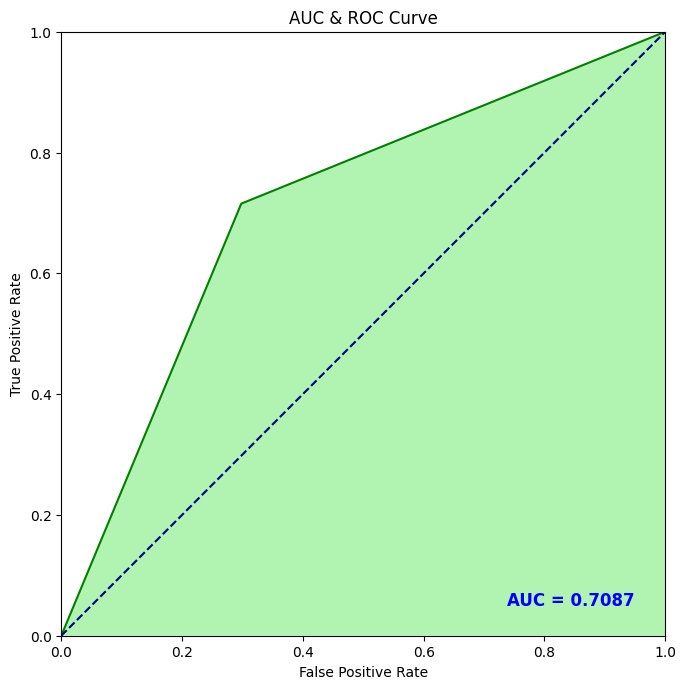

In [65]:
# ROC-AUC Curve

from sklearn import metrics

auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')

plt.show()

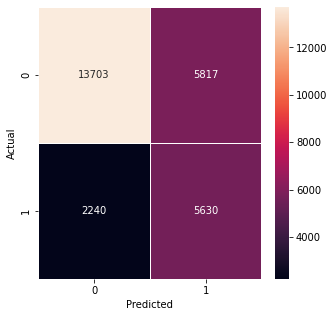

In [61]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt=".0f",ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Working on COMPANY PROVIDED TEST DATA**

In [44]:
test_df = pd.read_csv("testX.csv")
test_df1 = test_df.drop(['mvar47'], axis=1)
test_df2 = test_df1.replace(to_replace ="[a-zA-Z]+", value = np.nan, regex = True)
test_df2 = test_df2.astype('float')
test_df2 = pd.concat([test_df2, test_df['mvar47']], axis=1)
test_df2 = pd.get_dummies(test_df2, columns=['mvar47'])
df = test_df2.drop('application_key', axis=1)

In [45]:
df['mvar7'] = df['mvar7'] + df['mvar8'] 
df['mvar11_12'] = df['mvar11']/df['mvar12'] 
mvar161718 = (df['mvar16'].add(df['mvar17'], fill_value=0)).add(df['mvar18'], fill_value=0)
df['mvar16'] = mvar161718
df['mvar19'] = df['mvar19'] + df['mvar20'] 
df['mvar16_19'] = df['mvar16']/df['mvar19'] 
df['mvar26'] = (df['mvar26']+df['mvar27'])
df['mvar30'] = df['mvar30'] + df['mvar31']
df['mvar30_32'] = (df['mvar30']/30) / df['mvar32']
df['mvar35'] = df['mvar35'] + df['mvar34']
df['mvar28_36'] = df['mvar28'] / df['mvar36']
df['mvar22_38'] = (df['mvar22']/100) * df['mvar38']
df['mvar39_36'] = df['mvar39'] / df['mvar36']
df['mvar34_39'] = df['mvar34'] / df['mvar39']
df['mvar43_36'] = df['mvar43'] / df['mvar36']
df['mvar43_38'] = df['mvar43'] / df['mvar38']
df['mvar45'] = (df['mvar45'] + df['mvar46'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [46]:
#Since we have combined certain columns, we need to drop those which are already considered in the combination.

test_df3 = df.drop(['mvar8', 'mvar17', 'mvar18', 'mvar20', 'mvar22', 'mvar27', 'mvar31', 'mvar34', 'mvar38', 
                         'mvar46', 'mvar48', 'mvar49'], axis=1)

In [47]:
# dropping columns which have > 70% NULL values
test_df3 = test_df3.drop(['mvar30_32', 'mvar34_39', 'mvar30', 'mvar40'], axis=1)

**Scaling and normalisation**

*Robust Scaling*

In [48]:
# importing sklearn Min Max Scaler class which is for Robust scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler() # creating an instance of the class object
sc = rs.fit_transform(test_df3)
scaled_test = pd.DataFrame(sc, columns=test_df3.columns)

**Dropping Highly correlated and high VIF columns**

In [49]:
scaled_test1 = scaled_test.drop(['mvar32', 'mvar10'], axis=1)

**Imputing NULL values**

In [50]:
def new_col_for_null(df, column):
  df[column+'_null'] = np.where(df[column].isnull(), 1, 0)
  return df

In [51]:
for col in scaled_test1.columns:
  new_col_for_null(scaled_test1, col)

In [52]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(scaled_test1)
test_df4 = pd.DataFrame(imputed, columns=scaled_test1.columns)

In [ ]:
test_df4 = test_df4.drop('mvar47_C', axis=1)

In [80]:
# make predictions for test data
X_test = test_df4
y_pred = grid_result.predict(test_df4)

new = pd.DataFrame(y_pred, columns=['predictions'])

In [81]:
new.insert(0, "application_key", test_df['application_key'])

In [82]:
new = new.reset_index(drop=True)

In [83]:
new.to_csv('Daring_souls_14.csv', index=False)